##### CODE TO FILTER THE NUMBER OF NO FINDINGS IMAGES AND CANCER (MASS) LUNG IMAGES TO ROUGHLY (5700) IMAGES

In [1]:
# Importing Libs

import glob
import shutil
import os

In [37]:
# # This piece of code is to extract 5700 images from the MASS IMAGES

# src_dir = "D:/IIT/2nd Year/SDGP/Lung Cancer/Lung Cancer Detection/Nih All d/Mass"
# dst_dir = "D:/IIT/2nd Year/SDGP/Lung Cancer/Lung Cancer Detection/mass_images"   # create an empty folder and add the location

# counter = 0

# for jpgfile in glob.iglob(os.path.join(src_dir, "*.png")):
#     shutil.copy(jpgfile, dst_dir)
#     counter += 1
#     if(counter == 5700):
#         break

In [38]:
# # This piece of code is to extract 5700 images from the NO FINDINGS IMAGES

# src_dir = "D:/IIT/2nd Year/SDGP/Lung Cancer/Lung Cancer Detection/Nih All d/No Finding"
# dst_dir = "D:/IIT/2nd Year/SDGP/Lung Cancer/Lung Cancer Detection/noFindigs_images"   # create an empty folder and add the location

# counter = 0

# for jpgfile in glob.iglob(os.path.join(src_dir, "*.png")):
#     shutil.copy(jpgfile, dst_dir)
#     counter += 1
#     if(counter == 5700):
#         break


In [2]:
# # This piece of code is to split the Mass Lungs dataset into Testing and Training folders

# # Train Folder (80%) = 1260 images
# src_dir = "D:/IIT/2nd Year/SDGP/Lung Cancer/Lung Cancer Detection/Model/chest_xray/Train/Masses"
# dst_dir = "C:/Users/hamma/Desktop/New Lung Cancer Detection Model/chest_xray/Train/Masses"

# counter = 0

# for jpgfile in glob.iglob(os.path.join(src_dir, "*.png")):
#     shutil.move(jpgfile, dst_dir)
#     counter += 1
#     if(counter == 1260):
#         break


# # Test Folder (20%) = 315 images
# src_dir = "D:/IIT/2nd Year/SDGP/Lung Cancer/Lung Cancer Detection/Model/chest_xray/Test/Masses"
# dst_dir = "C:/Users/hamma/Desktop/New Lung Cancer Detection Model/chest_xray/Test/Masses"

# counter = 0

# for jpgfile in glob.iglob(os.path.join(src_dir, "*.png")):
#     shutil.move(jpgfile, dst_dir)
#     counter += 1
#     if(counter == 315):
#         break


In [5]:
# # This piece of code is to split the Healthy Lungs dataset into Testing and Training folders

# # Train Folder (80%) = 1260 images

# counter = 0

# for jpgfile in glob.iglob(os.path.join(src_dir, "*.jpeg")):
#     shutil.move(jpgfile, dst_dir)
#     counter += 1
#     if(counter == 1260):
#         break


# # Test Folder (20%) = 315 images
# src_dir = "C:/Users/hamma/Desktop/Healthy Lungs"
# dst_dir = "C:/Users/hamma/Desktop/New Lung Cancer Detection Model/chest_xray/Test/Healthy"

# counter = 0

# for jpgfile in glob.iglob(os.path.join(src_dir, "*.jpeg")):
#     shutil.move(jpgfile, dst_dir)
#     counter += 1
#     if(counter == 315):
#         break


## Lung Cancer Detection

In [6]:
import os
os.listdir('./chest_xray/')

['Test', 'Train']

## Importing libraries

In [7]:
from keras.layers import Input, Lambda, Dense, Flatten 
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os

## Re-sizing all the images

In [8]:
IMAGE_SIZE = [224, 224]

train_path = './chest_xray/Train'
test_path = './chest_xray/Test'

## Using VGG16 to create the model

In [9]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top = False)

### This is to NOT train existing weights

In [10]:
for layer in vgg.layers:
    layer.trainable = False

### Getting the number of folders which are my output classes

In [11]:
folders = glob(train_path + '/*')
folders

['./chest_xray/Train\\Healthy', './chest_xray/Train\\Masses']

### Creating a flatten layer to flatten the current vgg output

In [ ]:
x = Flatten()(vgg.output)

### Adding our last layer

In [13]:
prediction = Dense(len(folders), activation='softmax')(x)

### Creating a model object

In [14]:
model = Model(inputs=vgg.input, outputs=prediction)

### View the structure of the model

In [15]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

### Telling the model what cost and optimization method to use

In [16]:
model.compile(
    loss='categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

### Use the Image Data Generator to import the images from the dataset

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
training_set = train_datagen.flow_from_directory(train_path, target_size=(224,224), batch_size=32, class_mode='categorical')

Found 2520 images belonging to 2 classes.


In [19]:
training_set.class_indices

{'Healthy': 0, 'Masses': 1}

In [20]:
testing_set = test_datagen.flow_from_directory(test_path, target_size=(224,224), batch_size=32, class_mode='categorical')

Found 630 images belonging to 2 classes.


In [21]:
testing_set.class_indices

{'Healthy': 0, 'Masses': 1}

In [22]:
result = model.fit_generator(
    training_set,
    validation_data=testing_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(testing_set)
)
# val_accuracy: 100%
# accuracy: 99%

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
79/79 [==============================] - 930s 12s/step - loss: 0.1411 - accuracy: 0.9413 - val_loss: 0.0172 - val_accuracy: 0.9937
Epoch 2/10
79/79 [==============================] - 929s 12s/step - loss: 0.0111 - accuracy: 0.9964 - val_loss: 0.0113 - val_accuracy: 0.9984
Epoch 3/10
79/79 [==============================] - 1083s 14s/step - loss: 0.0090 - accuracy: 0.9972 - val_loss: 0.0095 - val_accuracy: 0.9984
Epoch 4/10
79/79 [==============================] - 1089s 14s/step - loss: 0.0068 - accuracy: 0.9980 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 5/10
79/79 [==============================] - 1047s 13s/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0077 - val_accuracy: 0.9984
Epoch 6/10
79/79 [==============================] - 1001s 13s/step - loss: 0.0038 - accuracy: 0.9992 - val_loss: 0.0100 - val_accuracy: 0.9937
Epoch 7/10
79/79 [==============================] - 1020s 13s/step -

In [23]:
#getting the accuracy
model.evaluate_generator(training_set)
# output [loss, accuracy]

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.0014946934534236789, 1.0]

In [24]:
#getting the validation accuracy
model.evaluate_generator(testing_set)
# output [val_loss, val_acc]

[0.005709246266633272, 0.9984126687049866]

[[315   0]
 [ 26 289]]
Testing Accuracy: 0.9587301587301588
Sensitivity: 0.9237536656891495
Specificity: 1.0


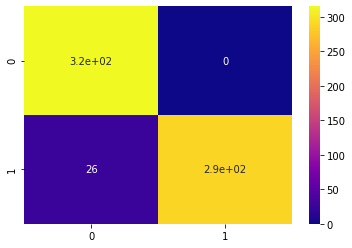

In [43]:
# Generate Confusion Matrix
import tensorflow as tf
y_actual = []
y_test = []

for i in os.listdir('./chest_xray/Test/Healthy/'):
    img = image.load_img('./chest_xray/Test/Healthy/'+i, target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = model.predict(img)
    p = np.argmax(p,axis=1)
    y_test.append(p[0])
    y_actual.append(0)
    
for i in os.listdir('./chest_xray/Test/Masses/'):
    img = image.load_img('./chest_xray/Test/Masses/'+i, target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = model.predict(img)
    p = np.argmax(p,axis=1)
    y_test.append(p[0])
    y_actual.append(1)
    
y_actual = np.array(y_actual)
y_test = np.array(y_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_actual, y_test)

import seaborn as sns
sns.heatmap(cm, cmap="plasma", annot=True)

model_TP = cm[0][0]
model_TN = cm[1][1]
model_FN = cm[1][0]
model_FP = cm[0][1]

print(cm)
print("Testing Accuracy:", (model_TP + model_TN) / (model_TP + model_TN + model_FP + model_FN))
print("Sensitivity:", (model_TP) / (model_TP + model_FN))
print("Specificity:", (model_TN) / (model_TN + model_FP))

### Plot the loss

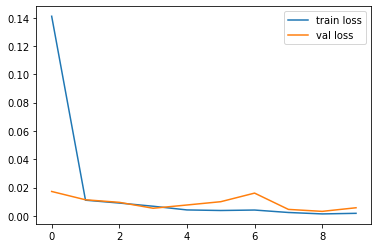

<Figure size 432x288 with 0 Axes>

In [28]:
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')